In [141]:
# basics
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# model selection
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV

# classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# metrics
from sklearn.metrics import  classification_report, confusion_matrix, ConfusionMatrixDisplay

# text
import spacy
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import TfidfVectorizer
import re

In [142]:
pd.set_option("display.max_colwidth", None)

# load dataset
df = pd.read_csv('spam.csv')
df.head(2)

,CATEGORY,MESSAGE,FILE_NAME
0,1,"Dear Homeowner,\n\n \n\nInterest Rates are at their lowest point in 40 years!\n\n\n\nWe help you find the best rate for your situation by\n\nmatching your needs with hundreds of lenders!\n\n\n\nHome Improvement, Refinance, Second Mortgage,\n\nHome Equity Loans, and More! Even with less than\n\nperfect credit!\n\n\n\nThis service is 100% FREE to home owners and new\n\nhome buyers without any obligation. \n\n\n\nJust fill out a quick, simple form and jump-start\n\nyour future plans today!\n\n\n\n\n\nVisit http://61.145.116.186/user0201/index.asp?Afft=QM10\n\n\n\n\n\n\n\n\n\n\n\n\n\nTo unsubscribe, please visit:\n\n\n\nhttp://61.145.116.186/light/watch.asp\n\n\n\n\n",00249.5f45607c1bffe89f60ba1ec9f878039a
1,1,"ATTENTION: This is a MUST for ALL Computer Users!!!\n\n\n\n*NEW-Special Package Deal!*\n\n\n\nNorton SystemWorks 2002 Software Suite -Professional Edition-\n\n\n\nIncludes Six - Yes 6! - Feature-Packed Utilities\n\nALL For 1 Special LOW Price!\n\n\n\nThis Software Will:\n\n- Protect your computer from unwanted and hazardous viruses\n\n- Help secure your private & valuable information\n\n- Allow you to transfer files and send e-mails safely\n\n- Backup your ALL your data quick and easily\n\n- Improve your PC's performance w/superior integral diagnostics!\n\n\n\n6 Feature-Packed Utilities...1 Great Price!\n\nA $300+ Combined Retail Value!\n\n\n\nYOURS for Only $29.99! <Includes FREE Shipping!>\n\n\n\nDon't fall prey to destructive viruses or hackers!\n\nProtect your computer and your valuable information!\n\n\n\n\n\nSo don't delay...get your copy TODAY!\n\n\n\n\n\nhttp://euro.specialdiscounts4u.com/\n\n++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++\n\nThis email has been screened and filtered by our in house """"OPT-OUT"""" system in \n\ncompliance with state laws. If you wish to ""OPT-OUT"" from this mailing as well \n\nas the lists of thousands of other email providers please visit \n\n\n\nhttp://dvd.specialdiscounts4u.com/optoutd.html\n\n++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++\n\n\n\n\n",00373.ebe8670ac56b04125c25100a36ab0510


In [143]:
# drop file_name feature
df.drop('FILE_NAME', axis=1, inplace=True)
df.shape

(5796, 2)

In [144]:
# na values
print(df.isna().sum())

CATEGORY     0
MESSAGE     19
dtype: int64


In [145]:
# dropna
df.dropna(inplace=True)

# final check
print(df.isna().sum())

CATEGORY    0
MESSAGE     0
dtype: int64


### preprocessing

In [146]:
df.head(2)

,CATEGORY,MESSAGE
0,1,"Dear Homeowner,\n\n \n\nInterest Rates are at their lowest point in 40 years!\n\n\n\nWe help you find the best rate for your situation by\n\nmatching your needs with hundreds of lenders!\n\n\n\nHome Improvement, Refinance, Second Mortgage,\n\nHome Equity Loans, and More! Even with less than\n\nperfect credit!\n\n\n\nThis service is 100% FREE to home owners and new\n\nhome buyers without any obligation. \n\n\n\nJust fill out a quick, simple form and jump-start\n\nyour future plans today!\n\n\n\n\n\nVisit http://61.145.116.186/user0201/index.asp?Afft=QM10\n\n\n\n\n\n\n\n\n\n\n\n\n\nTo unsubscribe, please visit:\n\n\n\nhttp://61.145.116.186/light/watch.asp\n\n\n\n\n"
1,1,"ATTENTION: This is a MUST for ALL Computer Users!!!\n\n\n\n*NEW-Special Package Deal!*\n\n\n\nNorton SystemWorks 2002 Software Suite -Professional Edition-\n\n\n\nIncludes Six - Yes 6! - Feature-Packed Utilities\n\nALL For 1 Special LOW Price!\n\n\n\nThis Software Will:\n\n- Protect your computer from unwanted and hazardous viruses\n\n- Help secure your private & valuable information\n\n- Allow you to transfer files and send e-mails safely\n\n- Backup your ALL your data quick and easily\n\n- Improve your PC's performance w/superior integral diagnostics!\n\n\n\n6 Feature-Packed Utilities...1 Great Price!\n\nA $300+ Combined Retail Value!\n\n\n\nYOURS for Only $29.99! <Includes FREE Shipping!>\n\n\n\nDon't fall prey to destructive viruses or hackers!\n\nProtect your computer and your valuable information!\n\n\n\n\n\nSo don't delay...get your copy TODAY!\n\n\n\n\n\nhttp://euro.specialdiscounts4u.com/\n\n++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++\n\nThis email has been screened and filtered by our in house """"OPT-OUT"""" system in \n\ncompliance with state laws. If you wish to ""OPT-OUT"" from this mailing as well \n\nas the lists of thousands of other email providers please visit \n\n\n\nhttp://dvd.specialdiscounts4u.com/optoutd.html\n\n++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++\n\n\n\n\n"


In [148]:
# clean text function (removeHTML)
def removehtml(text):

    soup = BeautifulSoup(text)

    return soup.get_text()


# cleaning data
df['MESSAGE_CLEAN'] = df['MESSAGE'].apply(removehtml)

df.head(2)

c:\Users\fer\AppData\Local\Programs\Python\Python310\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
c:\Users\fer\AppData\Local\Programs\Python\Python310\lib\site-packages\bs4\__init__.py:404: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


,CATEGORY,MESSAGE,MESSAGE_CLEAN
0,1,"Dear Homeowner,\n\n \n\nInterest Rates are at their lowest point in 40 years!\n\n\n\nWe help you find the best rate for your situation by\n\nmatching your needs with hundreds of lenders!\n\n\n\nHome Improvement, Refinance, Second Mortgage,\n\nHome Equity Loans, and More! Even with less than\n\nperfect credit!\n\n\n\nThis service is 100% FREE to home owners and new\n\nhome buyers without any obligation. \n\n\n\nJust fill out a quick, simple form and jump-start\n\nyour future plans today!\n\n\n\n\n\nVisit http://61.145.116.186/user0201/index.asp?Afft=QM10\n\n\n\n\n\n\n\n\n\n\n\n\n\nTo unsubscribe, please visit:\n\n\n\nhttp://61.145.116.186/light/watch.asp\n\n\n\n\n","Dear Homeowner,\n\n \n\nInterest Rates are at their lowest point in 40 years!\n\n\n\nWe help you find the best rate for your situation by\n\nmatching your needs with hundreds of lenders!\n\n\n\nHome Improvement, Refinance, Second Mortgage,\n\nHome Equity Loans, and More! Even with less than\n\nperfect credit!\n\n\n\nThis service is 100% FREE to home owners and new\n\nhome buyers without any obligation. \n\n\n\nJust fill out a quick, simple form and jump-start\n\nyour future plans today!\n\n\n\n\n\nVisit http://61.145.116.186/user0201/index.asp?Afft=QM10\n\n\n\n\n\n\n\n\n\n\n\n\n\nTo unsubscribe, please visit:\n\n\n\nhttp://61.145.116.186/light/watch.asp\n\n\n\n\n"
1,1,"ATTENTION: This is a MUST for ALL Computer Users!!!\n\n\n\n*NEW-Special Package Deal!*\n\n\n\nNorton SystemWorks 2002 Software Suite -Professional Edition-\n\n\n\nIncludes Six - Yes 6! - Feature-Packed Utilities\n\nALL For 1 Special LOW Price!\n\n\n\nThis Software Will:\n\n- Protect your computer from unwanted and hazardous viruses\n\n- Help secure your private & valuable information\n\n- Allow you to transfer files and send e-mails safely\n\n- Backup your ALL your data quick and easily\n\n- Improve your PC's performance w/superior integral diagnostics!\n\n\n\n6 Feature-Packed Utilities...1 Great Price!\n\nA $300+ Combined Retail Value!\n\n\n\nYOURS for Only $29.99! <Includes FREE Shipping!>\n\n\n\nDon't fall prey to destructive viruses or hackers!\n\nProtect your computer and your valuable information!\n\n\n\n\n\nSo don't delay...get your copy TODAY!\n\n\n\n\n\nhttp://euro.specialdiscounts4u.com/\n\n++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++\n\nThis email has been screened and filtered by our in house """"OPT-OUT"""" system in \n\ncompliance with state laws. If you wish to ""OPT-OUT"" from this mailing as well \n\nas the lists of thousands of other email providers please visit \n\n\n\nhttp://dvd.specialdiscounts4u.com/optoutd.html\n\n++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++\n\n\n\n\n","ATTENTION: This is a MUST for ALL Computer Users!!!\n\n\n\n*NEW-Special Package Deal!*\n\n\n\nNorton SystemWorks 2002 Software Suite -Professional Edition-\n\n\n\nIncludes Six - Yes 6! - Feature-Packed Utilities\n\nALL For 1 Special LOW Price!\n\n\n\nThis Software Will:\n\n- Protect your computer from unwanted and hazardous viruses\n\n- Help secure your private & valuable information\n\n- Allow you to transfer files and send e-mails safely\n\n- Backup your ALL your data quick and easily\n\n- Improve your PC's performance w/superior integral diagnostics!\n\n\n\n6 Feature-Packed Utilities...1 Great Price!\n\nA $300+ Combined Retail Value!\n\n\n\nYOURS for Only $29.99! \n\n\n\nDon't fall prey to destructive viruses or hackers!\n\nProtect your computer and your valuable information!\n\n\n\n\n\nSo don't delay...get your copy TODAY!\n\n\n\n\n\nhttp://euro.specialdiscounts4u.com/\n\n++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++\n\nThis email has been screened and filtered by our in house """"OPT-OUT"""" system in \n\ncompliance with state laws. If you wish to ""OPT-OUT"" from this mailing as well \n\nas the lists of thousands of other email providers please visit \n\n\n\nhttp://dvd.speciald

In [149]:
# load spacy model
nlp = spacy.load("en_core_web_lg")

# clean text function (stopwords, punctuation and URLs)
def clean_text(text):
    clean_text = []
    for token in nlp(text):
        if (
            not token.is_stop
            and not token.is_punct
            and not token.like_url
            ):
          clean_text.append(token.lemma_.lower())

    return " ".join(clean_text)


# cleaning data
df['MESSAGE_CLEAN'] = df['MESSAGE'].apply(clean_text)

df.head(2)

,CATEGORY,MESSAGE,MESSAGE_CLEAN
0,1,"Dear Homeowner,\n\n \n\nInterest Rates are at their lowest point in 40 years!\n\n\n\nWe help you find the best rate for your situation by\n\nmatching your needs with hundreds of lenders!\n\n\n\nHome Improvement, Refinance, Second Mortgage,\n\nHome Equity Loans, and More! Even with less than\n\nperfect credit!\n\n\n\nThis service is 100% FREE to home owners and new\n\nhome buyers without any obligation. \n\n\n\nJust fill out a quick, simple form and jump-start\n\nyour future plans today!\n\n\n\n\n\nVisit http://61.145.116.186/user0201/index.asp?Afft=QM10\n\n\n\n\n\n\n\n\n\n\n\n\n\nTo unsubscribe, please visit:\n\n\n\nhttp://61.145.116.186/light/watch.asp\n\n\n\n\n",dear homeowner \n\n \n\n interest rate low point 40 year \n\n\n\n help find good rate situation \n\n match need hundred lender \n\n\n\n home improvement refinance second mortgage \n\n home equity loans \n\n perfect credit \n\n\n\n service 100 free home owner new \n\n home buyer obligation \n\n\n\n fill quick simple form jump start \n\n future plan today \n\n\n\n\n\n visit \n\n\n\n\n\n\n\n\n\n\n\n\n\n unsubscribe visit \n\n\n\n \n\n\n\n\n
1,1,"ATTENTION: This is a MUST for ALL Computer Users!!!\n\n\n\n*NEW-Special Package Deal!*\n\n\n\nNorton SystemWorks 2002 Software Suite -Professional Edition-\n\n\n\nIncludes Six - Yes 6! - Feature-Packed Utilities\n\nALL For 1 Special LOW Price!\n\n\n\nThis Software Will:\n\n- Protect your computer from unwanted and hazardous viruses\n\n- Help secure your private & valuable information\n\n- Allow you to transfer files and send e-mails safely\n\n- Backup your ALL your data quick and easily\n\n- Improve your PC's performance w/superior integral diagnostics!\n\n\n\n6 Feature-Packed Utilities...1 Great Price!\n\nA $300+ Combined Retail Value!\n\n\n\nYOURS for Only $29.99! <Includes FREE Shipping!>\n\n\n\nDon't fall prey to destructive viruses or hackers!\n\nProtect your computer and your valuable information!\n\n\n\n\n\nSo don't delay...get your copy TODAY!\n\n\n\n\n\nhttp://euro.specialdiscounts4u.com/\n\n++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++\n\nThis email has been screened and filtered by our in house """"OPT-OUT"""" system in \n\ncompliance with state laws. If you wish to ""OPT-OUT"" from this mailing as well \n\nas the lists of thousands of other email providers please visit \n\n\n\nhttp://dvd.specialdiscounts4u.com/optoutd.html\n\n++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++\n\n\n\n\n",attention computer users \n\n\n\n new special package deal \n\n\n\n norton systemworks 2002 software suite -professional edition- \n\n\n\n include yes 6 feature pack utilities \n\n 1 special low price \n\n\n\n software \n\n protect computer unwanted hazardous virus \n\n help secure private valuable information \n\n allow transfer file send e mail safely \n\n backup datum quick easily \n\n improve pc performance w superior integral diagnostic \n\n\n\n 6 feature pack utilities 1 great price \n\n $ 300 + combined retail value \n\n\n\n $ 29.99 < include free shipping > \n\n\n\n fall prey destructive virus hacker \n\n protect computer valuable information \n\n\n\n\n\n delay copy today \n\n\n\n\n\n \n\n + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + \n\n email screen filter house opt system \n\n compliance state law wish opt mailing \n\n list thousand email provider visit \n\n\n\n \n\n + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + \n\n\n\n\n


In [152]:
# clean text function (1 len character)
def remove_character(text):

    return re.sub(r'[^A-Za-z0-9]+', r' ', text)


# cleaning data
df["MESSAGE_CLEAN"] = df["MESSAGE_CLEAN"].apply(remove_character)

df.head(2)

,CATEGORY,MESSAGE,MESSAGE_CLEAN
0,1,"Dear Homeowner,\n\n \n\nInterest Rates are at their lowest point in 40 years!\n\n\n\nWe help you find the best rate for your situation by\n\nmatching your needs with hundreds of lenders!\n\n\n\nHome Improvement, Refinance, Second Mortgage,\n\nHome Equity Loans, and More! Even with less than\n\nperfect credit!\n\n\n\nThis service is 100% FREE to home owners and new\n\nhome buyers without any obligation. \n\n\n\nJust fill out a quick, simple form and jump-start\n\nyour future plans today!\n\n\n\n\n\nVisit http://61.145.116.186/user0201/index.asp?Afft=QM10\n\n\n\n\n\n\n\n\n\n\n\n\n\nTo unsubscribe, please visit:\n\n\n\nhttp://61.145.116.186/light/watch.asp\n\n\n\n\n",dear homeowner interest rate low point 40 year help find good rate situation match need hundred lender home improvement refinance second mortgage home equity loans perfect credit service 100 free home owner new home buyer obligation fill quick simple form jump start future plan today visit unsubscribe visit
1,1,"ATTENTION: This is a MUST for ALL Computer Users!!!\n\n\n\n*NEW-Special Package Deal!*\n\n\n\nNorton SystemWorks 2002 Software Suite -Professional Edition-\n\n\n\nIncludes Six - Yes 6! - Feature-Packed Utilities\n\nALL For 1 Special LOW Price!\n\n\n\nThis Software Will:\n\n- Protect your computer from unwanted and hazardous viruses\n\n- Help secure your private & valuable information\n\n- Allow you to transfer files and send e-mails safely\n\n- Backup your ALL your data quick and easily\n\n- Improve your PC's performance w/superior integral diagnostics!\n\n\n\n6 Feature-Packed Utilities...1 Great Price!\n\nA $300+ Combined Retail Value!\n\n\n\nYOURS for Only $29.99! <Includes FREE Shipping!>\n\n\n\nDon't fall prey to destructive viruses or hackers!\n\nProtect your computer and your valuable information!\n\n\n\n\n\nSo don't delay...get your copy TODAY!\n\n\n\n\n\nhttp://euro.specialdiscounts4u.com/\n\n++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++\n\nThis email has been screened and filtered by our in house """"OPT-OUT"""" system in \n\ncompliance with state laws. If you wish to ""OPT-OUT"" from this mailing as well \n\nas the lists of thousands of other email providers please visit \n\n\n\nhttp://dvd.specialdiscounts4u.com/optoutd.html\n\n++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++\n\n\n\n\n",attention computer users new special package deal norton systemworks 2002 software suite professional edition include yes 6 feature pack utilities 1 special low price software protect computer unwanted hazardous virus help secure private valuable information allow transfer file send e mail safely backup datum quick easily improve pc performance w superior integral diagnostic 6 feature pack utilities 1 great price 300 combined retail value 29 99 include free shipping fall prey destructive virus hacker protect computer valuable information delay copy today email screen filter house opt system compliance state law wish opt mailing list thousand email provider visit


## 0: not spam

## 1: spam

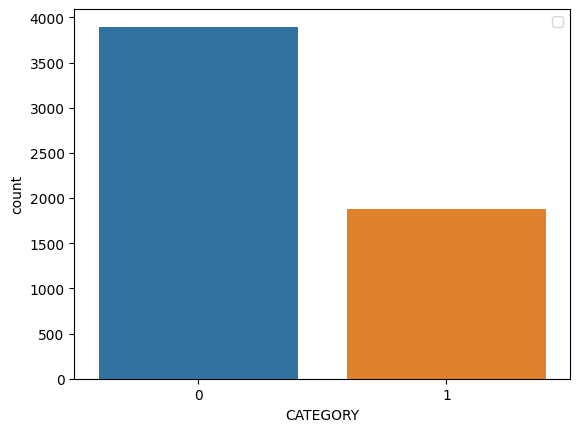

0    67.439848
1    32.560152
Name: CATEGORY, dtype: float64


In [29]:
# check target
plt.figure()
sns.countplot(x='CATEGORY', data=df, dodge=False)
plt.legend('')
plt.show()

print(df['CATEGORY'].value_counts(normalize=True)*100)

### RandomForestClassifier

In [153]:
# X and y
X = df['MESSAGE_CLEAN'].copy()
y = df['CATEGORY'].copy()

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# KFolds definition
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# tfidf vectorization
vect = TfidfVectorizer()
X_train_prep = vect.fit_transform(X_train)
X_test_prep = vect.transform(X_test)

In [176]:
# RandomizedSearchCV RFC with balanced class_weight

model = RandomForestClassifier(n_jobs=-1, class_weight='balanced',  random_state=42)

param_grid = {
            'n_estimators': [x for x in range(100, 150, 2)],
            'criterion': ['entropy', 'gini'],
            'max_depth': [x for x in range(5, 30, 2)],
            'min_samples_split': [x for x in range(70, 90, 2)],
            'min_samples_leaf': [x for x in range(1, 10, 1)],
            }

grid_rfc_cw = RandomizedSearchCV(estimator=model,
                                param_distributions=param_grid,
                                scoring='roc_auc',
                                n_jobs=-1,
                                cv=skf,
                                return_train_score=True,
                                )

grid_rfc_cw.fit(X_train_prep, y_train)

df_imbrfc_cw = pd.DataFrame(grid_rfc_cw.cv_results_)

# prints
print(f'best_params: {grid_rfc_cw.best_params_}')
train_score = float(df_imbrfc_cw.loc[df_imbrfc_cw['rank_test_score'] == 1, 'mean_train_score'])
print(f'train_score: {train_score}')
print(f'best_score: {grid_rfc_cw.best_score_}')

best_params: {'n_estimators': 146, 'min_samples_split': 82, 'min_samples_leaf': 3, 'max_depth': 29, 'criterion': 'gini'}
train_score: 0.9960984702175504
best_score: 0.9923703153951576


In [177]:
# classification report test
y_test_pred = grid_rfc_cw.best_estimator_.predict(X_test_prep)
cr = classification_report(y_test, y_test_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       780
           1       0.97      0.92      0.95       376

    accuracy                           0.97      1156
   macro avg       0.97      0.96      0.96      1156
weighted avg       0.97      0.97      0.97      1156



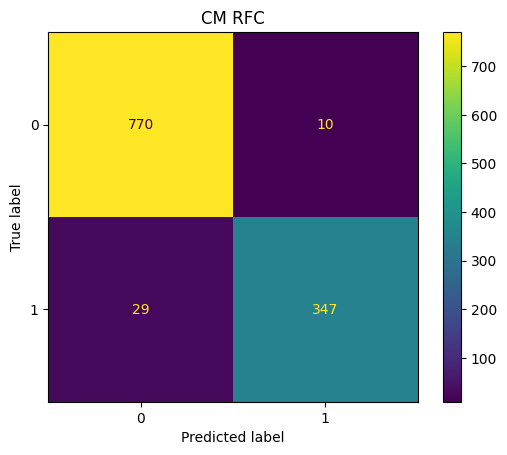

In [178]:
# confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title('CM RFC')
plt.show()

In [126]:
# GridSearchCV MLP

mlp = MLPClassifier(n_iter_no_change=5, random_state=42)

param_grid = {
            'alpha': [0.0001, 0.0005, 0.01],
            'hidden_layer_sizes': [(50, 25, 25), (100, 50, 50)],
            'activation': ['relu', 'tanh'],
            'solver': ['adam', 'lbfgs']
            }

grid_mlp = GridSearchCV(estimator=mlp,
                        param_grid=param_grid,
                        scoring='balanced_accuracy',
                        n_jobs=-1,
                        cv=skf,
                        return_train_score=True,
                        )

grid_mlp.fit(X_train_prep, y_train)

df_mlp = pd.DataFrame(grid_mlp.cv_results_)

# prints
print(f'best_params: {grid_mlp.best_params_}')
train_score = float(df_mlp.loc[df_mlp['rank_test_score'] == 1, 'mean_train_score'])
print(f'train_score: {train_score}')
print(f'test_score: {grid_mlp.best_score_}')

best_params: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50, 50), 'solver': 'adam'}
train_score: 1.0
test_score: 0.9852663406622121


In [127]:
# classification report test
y_test_pred_mlp = grid_mlp.best_estimator_.predict(X_test_prep)
cr_mlp = classification_report(y_test, y_test_pred_mlp)
print(cr)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       780
           1       0.97      0.92      0.94       376

    accuracy                           0.96      1156
   macro avg       0.97      0.95      0.96      1156
weighted avg       0.96      0.96      0.96      1156



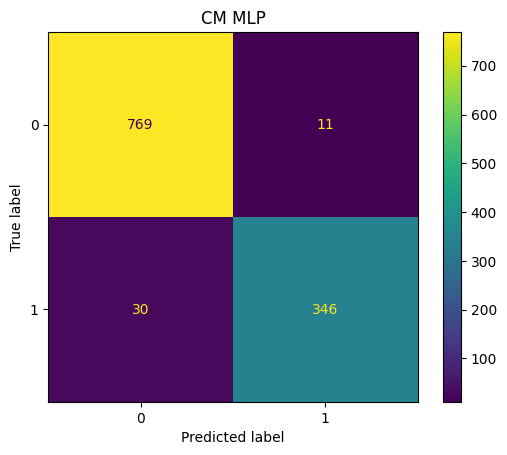

In [128]:
# confusion matrix
cm_mlp = confusion_matrix(y_test, y_test_pred_mlp)
disp_mlp = ConfusionMatrixDisplay(cm_mlp)
disp.plot()
plt.title('CM MLP')
plt.show()